---

_You are currently looking at **version 1.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

## Assignment 4 - Understanding and Predicting Property Maintenance Fines

This assignment is based on a data challenge from the Michigan Data Science Team ([MDST](http://midas.umich.edu/mdst/)). 

The Michigan Data Science Team ([MDST](http://midas.umich.edu/mdst/)) and the Michigan Student Symposium for Interdisciplinary Statistical Sciences ([MSSISS](https://sites.lsa.umich.edu/mssiss/)) have partnered with the City of Detroit to help solve one of the most pressing problems facing Detroit - blight. [Blight violations](http://www.detroitmi.gov/How-Do-I/Report/Blight-Complaint-FAQs) are issued by the city to individuals who allow their properties to remain in a deteriorated condition. Every year, the city of Detroit issues millions of dollars in fines to residents and every year, many of these fines remain unpaid. Enforcing unpaid blight fines is a costly and tedious process, so the city wants to know: how can we increase blight ticket compliance?

The first step in answering this question is understanding when and why a resident might fail to comply with a blight ticket. This is where predictive modeling comes in. For this assignment, your task is to predict whether a given blight ticket will be paid on time.

All data for this assignment has been provided to us through the [Detroit Open Data Portal](https://data.detroitmi.gov/). **Only the data already included in your Coursera directory can be used for training the model for this assignment.** Nonetheless, we encourage you to look into data from other Detroit datasets to help inform feature creation and model selection. We recommend taking a look at the following related datasets:

* [Building Permits](https://data.detroitmi.gov/Property-Parcels/Building-Permits/xw2a-a7tf)
* [Trades Permits](https://data.detroitmi.gov/Property-Parcels/Trades-Permits/635b-dsgv)
* [Improve Detroit: Submitted Issues](https://data.detroitmi.gov/Government/Improve-Detroit-Submitted-Issues/fwz3-w3yn)
* [DPD: Citizen Complaints](https://data.detroitmi.gov/Public-Safety/DPD-Citizen-Complaints-2016/kahe-efs3)
* [Parcel Map](https://data.detroitmi.gov/Property-Parcels/Parcel-Map/fxkw-udwf)

___

We provide you with two data files for use in training and validating your models: train.csv and test.csv. Each row in these two files corresponds to a single blight ticket, and includes information about when, why, and to whom each ticket was issued. The target variable is compliance, which is True if the ticket was paid early, on time, or within one month of the hearing data, False if the ticket was paid after the hearing date or not at all, and Null if the violator was found not responsible. Compliance, as well as a handful of other variables that will not be available at test-time, are only included in train.csv.

Note: All tickets where the violators were found not responsible are not considered during evaluation. They are included in the training set as an additional source of data for visualization, and to enable unsupervised and semi-supervised approaches. However, they are not included in the test set.

<br>

**File descriptions** (Use only this data for training your model!)

    readonly/train.csv - the training set (all tickets issued 2004-2011)
    readonly/test.csv - the test set (all tickets issued 2012-2016)
    readonly/addresses.csv & readonly/latlons.csv - mapping from ticket id to addresses, and from addresses to lat/lon coordinates. 
     Note: misspelled addresses may be incorrectly geolocated.

<br>

**Data fields**

train.csv & test.csv

    ticket_id - unique identifier for tickets
    agency_name - Agency that issued the ticket
    inspector_name - Name of inspector that issued the ticket
    violator_name - Name of the person/organization that the ticket was issued to
    violation_street_number, violation_street_name, violation_zip_code - Address where the violation occurred
    mailing_address_str_number, mailing_address_str_name, city, state, zip_code, non_us_str_code, country - Mailing address of the violator
    ticket_issued_date - Date and time the ticket was issued
    hearing_date - Date and time the violator's hearing was scheduled
    violation_code, violation_description - Type of violation
    disposition - Judgment and judgement type
    fine_amount - Violation fine amount, excluding fees
    admin_fee - $20 fee assigned to responsible judgments
state_fee - $10 fee assigned to responsible judgments
    late_fee - 10% fee assigned to responsible judgments
    discount_amount - discount applied, if any
    clean_up_cost - DPW clean-up or graffiti removal cost
    judgment_amount - Sum of all fines and fees
    grafitti_status - Flag for graffiti violations
    
train.csv only

    payment_amount - Amount paid, if any
    payment_date - Date payment was made, if it was received
    payment_status - Current payment status as of Feb 1 2017
    balance_due - Fines and fees still owed
    collection_status - Flag for payments in collections
    compliance [target variable for prediction] 
     Null = Not responsible
     0 = Responsible, non-compliant
     1 = Responsible, compliant
    compliance_detail - More information on why each ticket was marked compliant or non-compliant


___

## Evaluation

Your predictions will be given as the probability that the corresponding blight ticket will be paid on time.

The evaluation metric for this assignment is the Area Under the ROC Curve (AUC). 

Your grade will be based on the AUC score computed for your classifier. A model which with an AUROC of 0.7 passes this assignment, over 0.75 will recieve full points.
___

For this assignment, create a function that trains a model to predict blight ticket compliance in Detroit using `readonly/train.csv`. Using this model, return a series of length 61001 with the data being the probability that each corresponding ticket from `readonly/test.csv` will be paid, and the index being the ticket_id.

Example:

    ticket_id
       284932    0.531842
       285362    0.401958
       285361    0.105928
       285338    0.018572
                 ...
       376499    0.208567
       376500    0.818759
       369851    0.018528
       Name: compliance, dtype: float32
       
### Hints

* Make sure your code is working before submitting it to the autograder.

* Print out your result to see whether there is anything weird (e.g., all probabilities are the same).

* Generally the total runtime should be less than 10 mins. You should NOT use Neural Network related classifiers (e.g., MLPClassifier) in this question. 

* Try to avoid global variables. If you have other functions besides blight_model, you should move those functions inside the scope of blight_model.

* Refer to the pinned threads in Week 4's discussion forum when there is something you could not figure it out.

TRAIN 
Index(['ticket_id', 'agency_name', 'inspector_name', 'violator_name',
       'violation_street_number', 'violation_street_name',
       'violation_zip_code', 'mailing_address_str_number',
       'mailing_address_str_name', 'city', 'state', 'zip_code',
       'non_us_str_code', 'country', 'ticket_issued_date', 'hearing_date',
       'violation_code', 'violation_description', 'disposition', 'fine_amount',
       'admin_fee', 'state_fee', 'late_fee', 'discount_amount',
       'clean_up_cost', 'judgment_amount', 'payment_amount', 'balance_due',
       'payment_date', 'payment_status', 'collection_status',
       'grafitti_status', 'compliance_detail', 'compliance'],
      dtype='object')
TEST
Index(['ticket_id', 'agency_name', 'inspector_name', 'violator_name',
       'violation_street_number', 'violation_street_name',
       'violation_zip_code', 'mailing_address_str_number',
       'mailing_address_str_name', 'city', 'state', 'zip_code',
       'non_us_str_code', 'country', 'ticket_issued_date', 'hearing_date',
       'violation_code', 'violation_description', 'disposition', 'fine_amount',
       'admin_fee', 'state_fee', 'late_fee', 'discount_amount',
       'clean_up_cost', 'judgment_amount', 'grafitti_status'],
      dtype='object')
      
COMMON Index which are numbers
[violation_street_number, mailing_address_str_number, 'violation_zip_code','city', 'state', 'zip_code'
'non_us_str_code','fine_amount', 'admin_fee', 'state_fee', 'late_fee', 'discount_amount','clean_up_cost', 'judgment_amount']

# NOTE: THIS ASSIGNMENT CAN BE DONE IN MANY WAYS, i PICKED OUT SEEMINGLY 'GOOD' FEATURES AND USED IT DIRECTLY. WHAT SHOULD ALSO BE DONE IS GRIDSEARCH CV, FEATURE NORMALISATION, USING SOME CATEGORICAL VARIABLES

### to use categoricak varuuables, the reading here are important

Hi, while working on the assignment I realised that many of the columns contain string values for the train dataset. However, all datasets like cancer dataset or others used in course lectures contain only numerical entries for ML tasks. Thus, I decided to build my classifier on only numerical columns and was able to get full points for the assignment. Then, to optimise my classifier and increase my AUC score, I decided to use some of the categorical columns in my classifier.

I used the LabelEncoder() method to convert categorical data into class values corresponding to [0, 1, 2, and so on] based on number of classes or categories in that particular column. This helped me further improve my AUC score to 0.805. I am wondering if there are any other ways to handle categorical data when performing supervised learning?

Furthermore, I want to further optimise my classifier by first using unsupervised learning followed by supervised learning. I am planning on using PCA or a manifold learning technique like MDS or TSNE to get two new features and use a classifier on the new dataset to make predictions. Thus, I wanted to know that if I decided to use PCA or any manifold learning technique like MDS or TSNE, would LabelEncoder() still work for categorising data? That is, would I need to use LabelEncoder() to convert categorical data into class values like 0,1,2,etc. and then normalise using StandardScaler() and then perform unsupervised learning followed by supervised classifier learning? In short, how can I perform an unsupervised (transformation) learning on categorical data?

1 Reply
user profile avatar
Uwe F Mayer
Mentor
a year ago

There are many ways of handling categorical data. LabelEncoder is generally not a good choice because many models think that there's an intrinsic implied value comparison if they encounter values like 2, 3, 4. The models expect 2 < 3 < 4 to have some meaning. That's decidedly not the case if you encoded black=2, white=3, red=4.

Here's some reading:

  **https://pbpython.com/categorical-encoding.html**

  **https://towardsdatascience.com/understanding-feature-engineering-part-2-categorical-data-f54324193e63**

RB
Raunak Bhutoria
a year ago

Thank you for the information Uwe. I realised LabelEncoder might not be the best since it creates an order in data. Maybe it is the right method for Ordinal data. However going through the articles you posted, I found some other ways like **OneHotEncoder** or **FeatureHasher**. The problem with these methods is still that it adds new columns to the dataframe which then needs to be added into the classifier and this increases computational complexity. Although with FeatureHasher we can specify the number of new input features we want, it can still be an issue if we decide to use multiple categorical columns as input features for our classifier. We would then have to use FeatureHasher on all of them and create many more new columns or features that our classifier would have to use as input for making predictions. Wondering if there is any other technique that can limit the number of new features (binary or FeatureHasher) created when working with categorical data for ML tasks. Also, wondering if as a general rule we should first try to build models using numerical data and see if that matches the needed accuracy, recall, precision (or any other score as specified) and then move on to categorical data if we need further improvements?

user profile avatar
Uwe F Mayer
Mentor
a year ago

There are many ways to pre-processes categorical features, in particular if there's an understanding on what the features actually are.

One generic approach is implemented in http://contrib.scikit-learn.org/category_encoders/targetencoder.html. I've used that approach repeatedly (though not this implementation, I wrote my own one literally more than a decade ago). It works exceedingly well (if you set the right parameters) to transform categorical features for (logistic) regressions or neural networks. And yes, this transforms 1 categorical variable to 1 numerical variable.

**Finally, no, you cannot always start with the numerical features only, you might not even have any. Feature selection, either automatic or by knowledge (meaning humans make choices), is essential for many if not most classic modeling projects.**

Deep Neural Networks are a different beast where the huge volume of data lets one throw everything at a model, but that's a different discussion.

RB
Raunak Bhutoria
a year ago

Thank you for your inputs and for the resource links. Really appreciate it!

In [108]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot
from sklearn.metrics import roc_curve, auc, roc_auc_score

pd.set_option('display.max_columns', None)  # or 1000

#def blight_model():
    
    
train_df = pd.read_csv('readonly/train.csv', engine='python')
print(train_df.head(), train_df.columns)
#print(train_df.columns)
test_df = pd.read_csv('readonly/test.csv', engine='python')
#print(test_df.columns)
print(test_df.head(), test_df.columns)


add_df = pd.read_csv('readonly/addresses.csv', engine='python')
#print(add_df.head(), add_df.columns)
latlons_df = pd.read_csv('readonly/latlons.csv', engine='python')
#print(latlons_df.head(), latlons_df.columns)


    #return

#blight_model()

   ticket_id                                     agency_name  \
0      22056  Buildings, Safety Engineering & Env Department   
1      27586  Buildings, Safety Engineering & Env Department   
2      22062  Buildings, Safety Engineering & Env Department   
3      22084  Buildings, Safety Engineering & Env Department   
4      22093  Buildings, Safety Engineering & Env Department   

     inspector_name                      violator_name  \
0   Sims, Martinzie  INVESTMENT INC., MIDWEST MORTGAGE   
1  Williams, Darrin           Michigan, Covenant House   
2   Sims, Martinzie                    SANDERS, DERRON   
3   Sims, Martinzie                       MOROSI, MIKE   
4   Sims, Martinzie                    NATHANIEL, NEAL   

   violation_street_number violation_street_name  violation_zip_code  \
0                   2900.0                 TYLER                 NaN   
1                   4311.0               CENTRAL                 NaN   
2                   1449.0            LONGFELLOW  

In [109]:
df_1 = pd.merge(train_df, add_df, how='outer')#sab jagah ticket_id ka naam same ha, so just outer works
df = pd.merge(df_1, latlons_df, how='outer')
df = df.dropna(subset=['compliance'])  #dropping the NAN people from complance column

df = df[['violation_street_number', 'mailing_address_str_number','fine_amount', 'admin_fee', 'state_fee', 'late_fee', 'discount_amount','clean_up_cost', 'judgment_amount', 'compliance']]
df = df.fillna(0)
#df= df.astype('category')


## poora memory kha jayega

In [110]:

#df = pd.get_dummies(df)  #convert to categorical data


#Again you cannot do so. 
#This will create VERY large dataframe and it could not be held in 8 or 16 GB memory. 
#You need to select the features you want to get dummies, 
#and you also need to make sure it is reasonable to map those features into binary features.

In [111]:
#lst = [train_df, add_df, latlons_df,  df_1]
del train_df    # memory is released
del add_df
del latlons_df 
del df_1


In [112]:

X_data = df.drop('compliance', axis=1)    #df.drop('b', axis=1)
y_data = df['compliance']

X_data = pd.get_dummies(X_data)
#print(X_data.columns, y_data)
print(X_data.head(), '\n\n', y_data.head())


   violation_street_number  mailing_address_str_number  fine_amount  \
0                   2900.0                         3.0        250.0   
1                   2900.0                         3.0        500.0   
2                   2900.0                         3.0        250.0   
4                   2900.0                         3.0        100.0   
5                   2900.0                         3.0        300.0   

   admin_fee  state_fee  late_fee  discount_amount  clean_up_cost  \
0       20.0       10.0      25.0              0.0            0.0   
1       20.0       10.0      50.0              0.0            0.0   
2       20.0       10.0      25.0              0.0            0.0   
4       20.0       10.0      10.0              0.0            0.0   
5       20.0       10.0      30.0              0.0            0.0   

   judgment_amount  
0            305.0  
1            580.0  
2            305.0  
4            140.0  
5            360.0   

 0    0.0
1    0.0
2    0.0
4 

<function print>

In [113]:
from sklearn.tree import DecisionTreeClassifier
from adspy_shared_utilities import plot_decision_tree


X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, random_state = 1)

clf = GradientBoostingClassifier().fit(X_train, y_train)
print('GBDT default settings using accuracy as test')
print('Accuracy of GBDT classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of GBDT classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))


clf = GradientBoostingClassifier()

print('Cross-validation (AUC) Train', cross_val_score(clf, X_train, y_train, cv=5, scoring = 'roc_auc').mean())
print('Cross-validation (AUC) Test', cross_val_score(clf, X_test, y_test, cv=5, scoring = 'roc_auc').mean())

GBDT default settings using accuracy as test
Accuracy of GBDT classifier on training set: 0.94
Accuracy of GBDT classifier on test set: 0.93
Cross-validation (AUC) Train 0.769503250239
Cross-validation (AUC) Test 0.762225576183


In [126]:
clf = GradientBoostingClassifier()
grid_values = {'max_depth': [3,4,5,6,7]} #as I increase this, get better results

grid_clf_auc = GridSearchCV(clf, param_grid = grid_values, scoring = 'roc_auc').fit(X_train, y_train)

y_decision_fn_scores_auc = grid_clf_auc.decision_function(X_test) 


print('Test set AUC: ', roc_auc_score(y_test, y_decision_fn_scores_auc))
print('Grid best parameter (max. AUC): ', grid_clf_auc.best_params_)
print('Grid best score (AUC): ', grid_clf_auc.best_score_)


Test set AUC:  0.777591556643
Grid best parameter (max. AUC):  {'max_depth': 7}
Grid best score (AUC):  0.778094932597


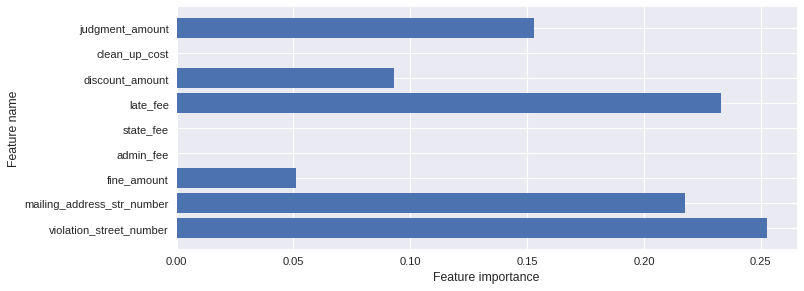

Feature importances: [ 0.2527141   0.21742074  0.05101539  0.          0.          0.23285209
  0.093108    0.          0.15288968]


In [130]:
from adspy_shared_utilities import plot_feature_importances
import matplotlib.pyplot as plt

clf = GradientBoostingClassifier().fit(X_train, y_train)
#grid_clf_auc = GridSearchCV(clf, param_grid = {'max_depth': [7]}, scoring = 'roc_auc').fit(X_train, y_train)

plt.figure(figsize=(10,4), dpi=80)
plot_feature_importances(clf, X_train.columns)
plt.show()

print('Feature importances: {}'.format(clf.feature_importances_))

In [ ]:
#blight_model()

In [ ]:
GradientBoostingClassifier().get_params().keys()

## ye feature importances lekar mai final model le raha hu
# takes 7-10 minutes to run

   ticket_id                                     agency_name  \
0      22056  Buildings, Safety Engineering & Env Department   
1      27586  Buildings, Safety Engineering & Env Department   
2      22062  Buildings, Safety Engineering & Env Department   
3      22084  Buildings, Safety Engineering & Env Department   
4      22093  Buildings, Safety Engineering & Env Department   

     inspector_name                      violator_name  \
0   Sims, Martinzie  INVESTMENT INC., MIDWEST MORTGAGE   
1  Williams, Darrin           Michigan, Covenant House   
2   Sims, Martinzie                    SANDERS, DERRON   
3   Sims, Martinzie                       MOROSI, MIKE   
4   Sims, Martinzie                    NATHANIEL, NEAL   

   violation_street_number violation_street_name  violation_zip_code  \
0                   2900.0                 TYLER                 NaN   
1                   4311.0               CENTRAL                 NaN   
2                   1449.0            LONGFELLOW  

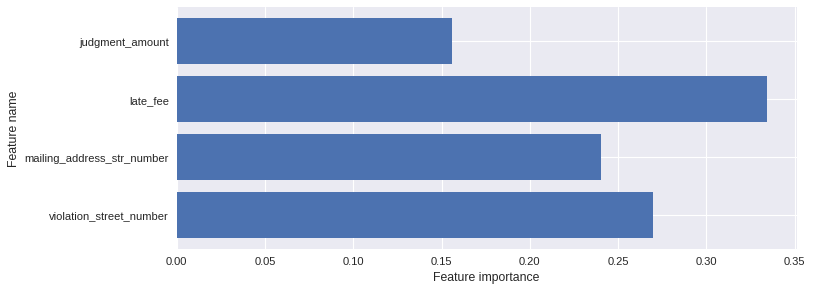

In [132]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot, plot_decision_tree
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.tree import DecisionTreeClassifier


pd.set_option('display.max_columns', None)

def blight_model():


    train_df = pd.read_csv('readonly/train.csv', engine='python')
    print(train_df.head(), train_df.columns)
    #print(train_df.columns)
    test_df = pd.read_csv('readonly/test.csv', engine='python')
    #print(test_df.columns)
    #print(test_df.head(), test_df.columns)


    add_df = pd.read_csv('readonly/addresses.csv', engine='python')
    #print(add_df.head(), add_df.columns)
    latlons_df = pd.read_csv('readonly/latlons.csv', engine='python')
    #print(latlons_df.head(), latlons_df.columns)


    
    df_1 = pd.merge(train_df, add_df, how='outer')#sab jagah ticket_id ka naam same ha, so just outer works
    df = pd.merge(df_1, latlons_df, how='outer')
    df = df.dropna(subset=['compliance'])  #dropping the NAN people from complance column

    df = df[['violation_street_number', 'mailing_address_str_number', 'late_fee',  'judgment_amount', 'compliance']]
    df = df.fillna(0)

    
    
    lst = [train_df, add_df, latlons_df,  df_1]
    del lst    # memory is released




    X_data = df.drop('compliance', axis=1)    #df.drop('b', axis=1)
    y_data = df['compliance']

    X_data = pd.get_dummies(X_data)
    #print(X_data.columns, y_data)
    #print(X_data.head(), '\n\n', y_data.head())
    
    
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, random_state = 1)

    clf = GradientBoostingClassifier()
    
    grid_values = {'max_depth': [5, 7, 9, 11]} #as I increase this, get better results
    grid_clf_auc = GridSearchCV(clf, param_grid = grid_values, scoring = 'roc_auc').fit(X_train, y_train)
    y_decision_fn_scores_auc = grid_clf_auc.decision_function(X_test) 


    print('FINAL ANSWER Test set AUC: ', roc_auc_score(y_test, y_decision_fn_scores_auc))
    print('Grid best parameter (max. AUC): ', grid_clf_auc.best_params_)
    print('Grid best score (AUC): ', grid_clf_auc.best_score_)
    
    clf = GradientBoostingClassifier().fit(X_train, y_train)
    plt.figure(figsize=(10,4), dpi=80)
    plot_feature_importances(clf, X_train.columns)
    plt.show()
    
    
    return

blight_model()